In [1]:
## VISSIM Modules
import win32com.client as com
import os

## RL Modules
import tensorflow as tf
if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("ERROR: GPU DEVICE NOT FOUND.")

from keras.models import load_model
    
## Data Management Modules
import pickle

## User Defined Modules
import Simulator_Functions as SF

from RLAgents import DQNAgent
from NParser import NetworkParser
from COMServer import COMServerDispatch, COMServerReload
from TupleToList import toList
## Other Modules
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

Default GPU Device: /device:GPU:0


Using TensorFlow backend.


In [2]:
## Network Model Parameters
Random_Seed = 42
model_name  = 'Single_Cross_Straight'
vissim_working_directory = 'C:\\Users\\acabrejasegea\\OneDrive - The Alan Turing Institute\\Desktop\\ATI\\0_TMF\\MLforFlowOptimisation\\Vissim\\'
program = 'DDQN' # DQN, DuelingDQN, DDQN, DuelingDDQN
reward_type = 'Queues'
state_type  = 'Queues'
## Use of additional files?
flag_read_additionally  = False
## Load trained model?
Demo_Mode = False
load_trained = False
Quickmode = True
SaveResultsAgent = True
# Random demand
Random_Demand = True

In [3]:
## Data handling flags
# Flag for restarting the COM Server
reset_flag = True
#cache_flag = False
# If a fresh start is needed, all previous results from simulations are deleted
Start_Fresh = True
# Debug action
debug_action = False

In [4]:
## RL Hyperparamenters
# Number of simulations, save every "n" episodes and copy weights with frequency "f"
episodes = 100
partial_save_at = 10
copy_weights_frequency = 5
reset_frequency = 10
# Timesteps per simulation (1 timestep = 0.1 sec), length for random population is a multiple of episode
simulation_length = 36000*1
memory_population_length = simulation_length*5
## State-Action Parameters
state_size = 4
action_size = 5
# Memory Size
memory_size = 5000
# Batch Size
batch_size = 128
# Learning Rate
alpha   = 0.0005
# Discount Factor
gamma   = 0.9
# Exploration Schedule
epsilon_start = 1
epsilon_end   = 0.01
epsilon_decay = (epsilon_end - epsilon_start)/(episodes-1)
#epsilon_decay = np.power(epsilon_end/epsilon_start, 1./(episodes+1)) # Geometric decay
# Demand Schedule
demands = [100, 200, 400, 600, 800, 1000]
# Session ID
Session_ID = 'Episodes'+str(episodes)+'_Program'+program

Working Directory set to: C:\Users\acabrejasegea\OneDrive - The Alan Turing Institute\Desktop\ATI\0_TMF\MLforFlowOptimisation\Vissim\
Generating Cache...
Cache generated.

****************************
*   COM Server dispatched  *
****************************

Loading Model File: Single_Cross_Straight.inpx ...
Load process successful
Simulation length set to 18000.0 seconds.
Results from Previous Simulations: Deleted. Fresh Start Available.
Fetched and containerized Simulation Object
Fetched and containerized Network Object 

*******************************************************
*                                                     *
*                 SETUP COMPLETE                      *
*                                                     *
*******************************************************

Random seed set in simulator. Random Seed = 42
NetworkParser has succesfully crawled the model network.
Deploying instance of Double Deep Q Learning Agent(s)
Deployed 1 agent(s) of the Cla

Episode: 24/100, Epsilon:0.77, Average reward: -151.59
Prediction for [500,0,500,0] is: [[-2838.8167 -2900.561  -2757.7522 -2935.093  -2946.882 ]]
Results from Previous Simulations: Deleted. Fresh Start Available.
Reloading complete. Executing new episode...
Episode: 25/100, Epsilon:0.76, Average reward: -133.68
Prediction for [500,0,500,0] is: [[-2901.4824 -2939.661  -2706.6267 -2806.683  -3054.409 ]]
Weights succesfully copied to Target model.
Results from Previous Simulations: Deleted. Fresh Start Available.
Reloading complete. Executing new episode...
Episode: 26/100, Epsilon:0.75, Average reward: -92.73
Prediction for [500,0,500,0] is: [[-3161.0076 -2982.485  -2651.0173 -3038.0703 -3047.9814]]
Results from Previous Simulations: Deleted. Fresh Start Available.
Reloading complete. Executing new episode...
Episode: 27/100, Epsilon:0.74, Average reward: -37.92
Prediction for [500,0,500,0] is: [[-3388.2212 -2951.8623 -2890.9304 -3015.6113 -3194.5474]]
Results from Previous Simulations:

Results from Previous Simulations: Deleted. Fresh Start Available.
Reloading complete. Executing new episode...
Episode: 54/100, Epsilon:0.47, Average reward: -150.13
Prediction for [500,0,500,0] is: [[-3947.4565 -3594.1323 -3996.3452 -3648.198  -3893.6008]]
Results from Previous Simulations: Deleted. Fresh Start Available.
Reloading complete. Executing new episode...
Episode: 55/100, Epsilon:0.46, Average reward: -55.57
Prediction for [500,0,500,0] is: [[-3720.507  -3419.7527 -3738.941  -3643.5515 -3852.568 ]]
Weights succesfully copied to Target model.
Results from Previous Simulations: Deleted. Fresh Start Available.
Reloading complete. Executing new episode...
Episode: 56/100, Epsilon:0.45, Average reward: -101.21
Prediction for [500,0,500,0] is: [[-4018.7725 -3511.6453 -4044.4849 -3915.3618 -4049.9656]]
Results from Previous Simulations: Deleted. Fresh Start Available.
Reloading complete. Executing new episode...
Episode: 57/100, Epsilon:0.44, Average reward: -260.37
Prediction fo

Results from Previous Simulations: Deleted. Fresh Start Available.
Reloading complete. Executing new episode...
Episode: 83/100, Epsilon:0.18, Average reward: -81.71
Prediction for [500,0,500,0] is: [[-4395.4517 -4041.1787 -4074.3064 -4548.132  -4316.372 ]]
Results from Previous Simulations: Deleted. Fresh Start Available.
Reloading complete. Executing new episode...
Episode: 84/100, Epsilon:0.17, Average reward: -138.85
Prediction for [500,0,500,0] is: [[-4247.1567 -3880.571  -3825.447  -4213.8086 -4164.3564]]
Results from Previous Simulations: Deleted. Fresh Start Available.
Reloading complete. Executing new episode...
Episode: 85/100, Epsilon:0.16, Average reward: -10.17
Prediction for [500,0,500,0] is: [[-3857.5034 -3393.474  -3491.6445 -3894.5127 -3865.3706]]
New best agent found. Saved in C:\Users\acabrejasegea\OneDrive - The Alan Turing Institute\Desktop\ATI\0_TMF\MLforFlowOptimisation\Vissim\Single_Cross_Straight\Single_Cross_Straight_Episodes100_ProgramDDQN_BestAgent0_Memory.p

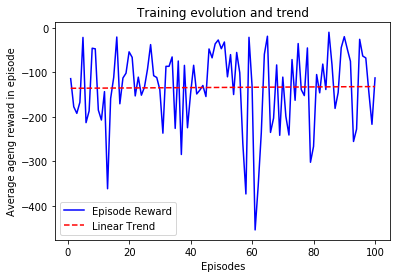

In [5]:
if __name__ == "__main__":
    # Initialize storage
    reward_storage = []
    best_agent_weights = []
    
    # If previous agents aren't to be loaded, proceed to memory population
    if not load_trained:
        # Initialize simulation
        if 'Vissim' not in globals() or Vissim == None:
            Vissim, Simulation, Network, cache_flag = COMServerDispatch(model_name, vissim_working_directory,\
                                                                        memory_population_length, Start_Fresh,\
                                                                        reset_flag = True, verbose = True)
        else:
            Vissim = com.Dispatch("Vissim.Vissim")
            Simulation, Network = COMServerReload(Vissim, model_name, vissim_working_directory,\
                                                  memory_population_length, Start_Fresh, reset_flag = True)
        
    # Setting Random Seed
    Vissim.Simulation.SetAttValue('RandSeed', Random_Seed)
    print ('Random seed set in simulator. Random Seed = '+str(Random_Seed))

    # Deploy Network Parser (crawl network)
    npa = NetworkParser(Vissim)
    print('NetworkParser has succesfully crawled the model network.')
    
    # Initialize agents
    if program == "DQN":
        Agents = [DQNAgent(state_size, action_size, ID, state_type, npa, memory_size, gamma, 0 if Demo_Mode else epsilon_start,\
                           epsilon_end, epsilon_decay, alpha, copy_weights_frequency, Vissim, DoubleDQN = False, Dueling = False) for ID in npa.signal_controllers_ids] 
        agents_deployed = True
    elif program == "DuelingDQN":
        Agents = [DQNAgent(state_size, action_size, ID, state_type, npa, memory_size, gamma, 0 if Demo_Mode else epsilon_start,\
                           epsilon_end, epsilon_decay, alpha, copy_weights_frequency, Vissim, DoubleDQN = False, Dueling = False) for ID in npa.signal_controllers_ids] 
        agents_deployed = True
    elif program == "DDQN":
        Agents = [DQNAgent(state_size, action_size, ID, state_type, npa, memory_size, gamma, 0 if Demo_Mode else epsilon_start,\
                           epsilon_end, epsilon_decay, alpha, copy_weights_frequency, Vissim, DoubleDQN = True, Dueling = False) for ID in npa.signal_controllers_ids] 
        agents_deployed = True
    elif program == "DuelingDDQN":
        Agents = [DQNAgent(state_size, action_size, ID, state_type, npa, memory_size, gamma, 0 if Demo_Mode else epsilon_start,\
                           epsilon_end, epsilon_decay, alpha, copy_weights_frequency, Vissim, DoubleDQN = True, Dueling = True) for ID in npa.signal_controllers_ids] 
        agents_deployed = True
    else:
        print("Incorrect Agent Class selected. Deployment could not be completed.")
        quit()
    
    if agents_deployed:
        print("Deployed {} agent(s) of the Class {}.".format(len(Agents), program))
    
    if Demo_Mode:
        Agents = SF.load_agents(vissim_working_directory, model_name, Agents, Session_ID, best = True)
        SF.run_simulation_episode(Agents, Vissim, state_type, state_size, memory_population_length, Demo_Mode)
        Vissim = None
    # Load previous trained data
    elif load_trained:
        Agents = SF.load_agents(vissim_working_directory, model_name, Agents, Session_ID, best = False)
    # If previous data isn't to be loaded, have an initial longer random run to populate memory
    else:
        print('Populating memory with Random Actions....')
        SF.Set_Quickmode(Vissim)
        SF.run_simulation_episode(Agents, Vissim, state_type, state_size, memory_population_length, Demo_Mode)
    
    # Iterations of the simulation
    for episode in range(episodes):
        # Completely re-dispatch server every N iterations for performance
        if episode % reset_frequency == 0 and episode !=0:
            Vissim = None
            Vissim, Simulation, Network, cache_flag = COMServerDispatch(model_name, vissim_working_directory,\
                                                                        simulation_length, Start_Fresh,\
                                                                        reset_flag = True, verbose = False)
            print("Redispatched")
        else:
            # If not the first episode, reset state at the start
            Simulation, Network = COMServerReload(Vissim, model_name, vissim_working_directory,\
                                                simulation_length, Start_Fresh, reset_flag = True)
        npa = NetworkParser(Vissim) 
        for index, agent in enumerate(Agents):
            agent.update_IDS(npa.signal_controllers_ids[index], npa)
            agent.episode_reward = []
        
        # Change demand for every episode
        if Random_Demand:
            for vehicle_input in range(1,5):
                Vissim.Net.VehicleInputs.ItemByKey(vehicle_input).SetAttValue('Volume(1)', demands[np.random.randint(0,len(demands)-1)])    
        
        # Run Episode at maximum speed

        SF.Set_Quickmode(Vissim)
        SF.run_simulation_episode(Agents, Vissim, state_type, state_size, simulation_length, Demo_Mode)
        
        # Calculate episode average reward
        reward_storage, average_reward = SF.average_reward(reward_storage, Agents, episode, episodes)
        best_agent_weights = SF.best_agent(reward_storage, average_reward, best_agent_weights, vissim_working_directory, model_name, Agents, Session_ID)
        
        # Train agent with experience of episode (indicated batch size)
        for agent in Agents:
            agent.replay(batch_size, episode)
        # Security save for long trainings
        if SaveResultsAgent:
            if (episode+1)%partial_save_at == 0:
                SF.save_agents(vissim_working_directory, model_name, Agents, Session_ID, reward_storage)
                print('Saved Partial results at the end of episode {}.'.format(episode+1))

    #Saving agents memory, weights and optimizer
    if SaveResultsAgent:
        SF.save_agents(vissim_working_directory, model_name, Agents, Session_ID, reward_storage)
        print("Model, architecture, weights, optimizer, memory and training results succesfully saved. Succesfully Terminated.")
    
    # Plotting training progress
    x_series = range(1,len(reward_storage)+1)
    fit = np.polyfit(x_series,reward_storage,1)
    fit_fn = np.poly1d(fit) 
    plt.plot(x_series,reward_storage, '-b', x_series, fit_fn(x_series), '--r')
    plt.xlabel('Episodes')
    plt.ylabel('Average ageng reward in episode')
    plt.title('Training evolution and trend')
    plt.gca().legend(('Episode Reward','Linear Trend'))
    plt.show()
    
    # Close Vissim
    Vissim = None

In [ ]:
Demo_Mode = True
if __name__ == "__main__":
    # Initialize storage
    reward_storage = []
    
    # If previous agents aren't to be loaded, proceed to memory population
    if not load_trained:
        # Initialize simulation
        if 'Vissim' not in globals() or Vissim == None:
            Vissim, Simulation, Network, cache_flag = COMServerDispatch(model_name, vissim_working_directory,\
                                                                        memory_population_length, Start_Fresh, reset_flag = True)
        else:
            Vissim = com.Dispatch("Vissim.Vissim")
            Simulation, Network = COMServerReload(Vissim, model_name, vissim_working_directory,\
                                                  memory_population_length, Start_Fresh, reset_flag = True)
        
    # Setting Random Seed
    Vissim.Simulation.SetAttValue('RandSeed', Random_Seed)
    print ('Random seed set in simulator. Random Seed = '+str(Random_Seed))

    # Deploy Network Parser (crawl network)
    npa = NetworkParser(Vissim)
    print('NetworkParser has succesfully crawled the model network.')
    
    # Initialize agents
    if program == "DQN":
        Agents = [DQNAgent(state_size, action_size, ID, state_type, npa, memory_size, gamma, 0 if Demo_Mode else epsilon_start,\
                           epsilon_end, epsilon_decay, alpha, Vissim, DoubleDQN = False, Dueling = False) for ID in npa.signal_controllers_ids] 
        agents_deployed = True
    elif program == "DDQN":
        Agents = [DQNAgent(state_size, action_size, ID, state_type, npa, memory_size, gamma, 0 if Demo_Mode else epsilon_start,\
                           epsilon_end, epsilon_decay, alpha, Vissim, DoubleDQN = True, Dueling = False) for ID in npa.signal_controllers_ids] 
        agents_deployed = True
    elif program == "DuelingDQN":
        Agents = [DQNAgent(state_size, action_size, ID, state_type, npa, memory_size, gamma, 0 if Demo_Mode else epsilon_start,\
                           epsilon_end, epsilon_decay, alpha, copy_weights_frequency, Vissim, DoubleDQN = True, Dueling = True) for ID in npa.signal_controllers_ids] 
      
        agents_deployed = True
    else:
        print("Incorrect Agent Class selected. Deployment could not be completed.")
        quit()
    
    if agents_deployed:
        print("Deployed {} agent(s) of the Class {}.".format(len(Agents), program))
    
    if Demo_Mode:
        for index, agent in enumerate(Agents):
            Filename = os.path.join(vissim_working_directory, model_name, model_name+'_'+ Session_ID + '_Agent'+str(index)+'.h5')
            agent.model = load_model(Filename)
            Memory_Filename = os.path.join(vissim_working_directory, model_name, model_name+'_'+ Session_ID + '_Agent'+str(index)+'_Memory'+'.p')
            agent.memory = pickle.load(open(Memory_Filename, 'rb'))
        print('Items successfully loaded.')        
        SF.run_simulation_episode(Agents, Vissim, state_type, state_size, memory_population_length, Demo_Mode = True)
        Vissim = None

In [ ]:
 # Plotting training progress
    x_series = range(1,len(reward_storage)+1)
    fit = np.polyfit(x_series,reward_storage,1)
    fit_fn = np.poly1d(fit) 
    plt.plot(x_series,reward_storage, '-b', x_series, fit_fn(x_series), '--r')
    plt.xlabel('Episodes')
    plt.ylabel('Average ageng reward in episode')
    plt.title('Training evolution and trend')
    plt.gca().legend(('Episode Reward','Linear Trend'))
    plt.show()
    